# **Monte Carlo**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze  # importing the maze environment
from utils import plot_policy, plot_action_values, test_agent  # importing helper functions for visualization and testing

## **Initialise the environment**

In [ ]:
env = Maze()  # creating an instance of the maze environment

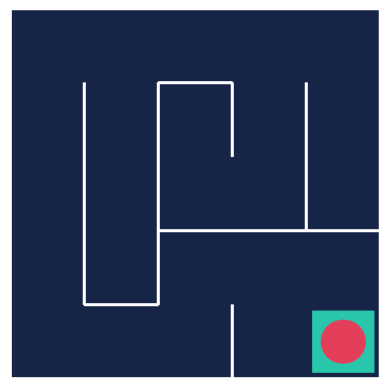

In [ ]:
frame = env.render(mode='rgb_array')  # rendering the maze as an image in rgb format
plt.axis("off")  # hiding the axis for a cleaner display
plt.imshow(frame)  # displaying the rendered maze image

In [ ]:
print(f"Observation space shape: {env.observation_space.nvec}")  # printing the shape of the observation space
print(f"Number of actions: {env.action_space.n}")  # printing the total number of possible actions

Observation space shape: [5 5]
Number of actions: 4


## **Define Value table Q(s,a)**

### Create the Q(s,a) table

In [ ]:
action_values = np.zeros(shape=(5,5,4))  # creating a 3d array filled with zeros to store action values for a 5x5 grid with 4 possible actions

### Plot Q(s,a)

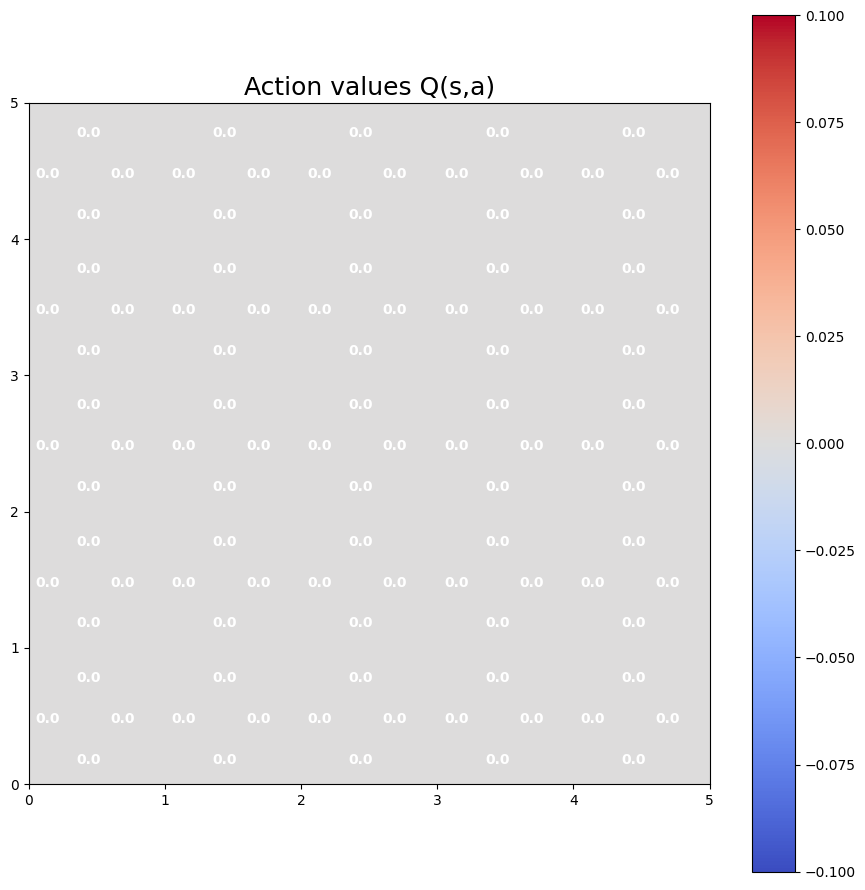

In [ ]:
plot_action_values(action_values)  # visualizing the action values using the helper function

### Create the policy pi(s)

In [ ]:
def policy(state, epsilon=0.):  # defining a policy function, epsilon controls randomness
    if np.random.random() < epsilon:  # with probability epsilon, choose a random action (exploration)
        return np.random.randint(4)  # selecting a random action (0 to 3)
    else:
        av = action_values[state]  # getting action values for the given state
        return np.random.choice(np.flatnonzero(av == av.max()))  # choosing the action with the highest value, breaking ties randomly

### Test the policy with the state (0,0)

In [ ]:
action = policy((0,0), 2)  # selecting an action for state (0,0) with epsilon = 2 (full exploration)
print(f"Action taken in state (0,0): {action}")  # printing the chosen action

Action taken in state (0,0): 3


### Plot the policy

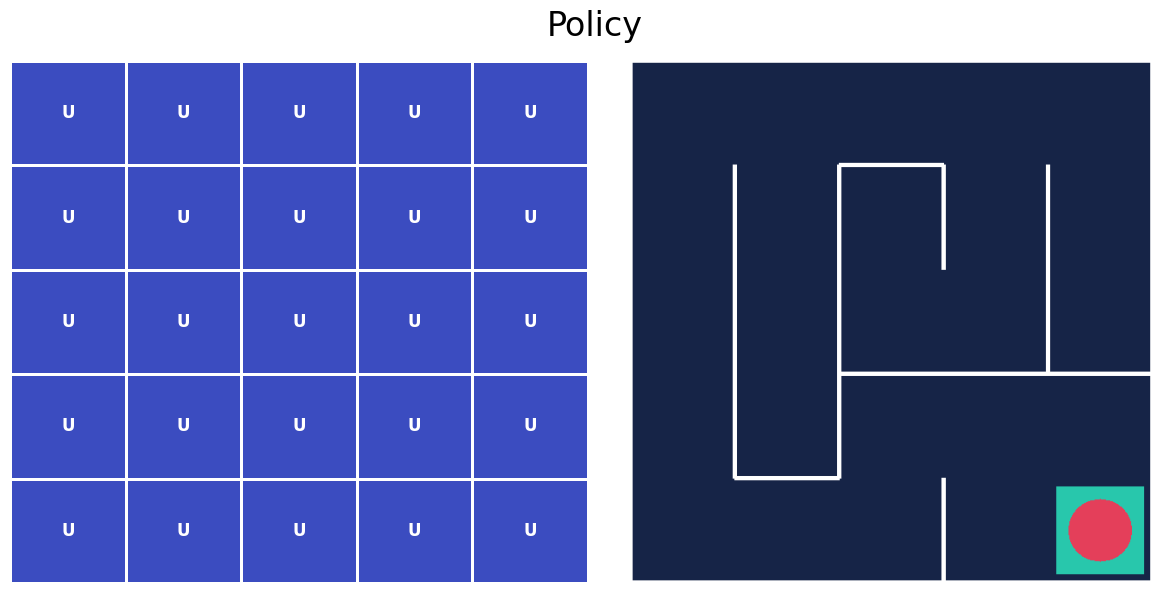

In [ ]:
plot_policy(action_values, frame)  # visualizing the policy based on the action values on top of the maze image

### Implement the algorithm

In [ ]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):
    # function to perform on-policy monte carlo control
    # policy: function to select actions
    # action_values: table storing action values
    # episodes: number of episodes to run
    # gamma: discount factor for future rewards
    # epsilon: exploration factor

    sa_returns = {}  # dictionary to store returns for state-action pairs

    for episode in range(1, episodes + 1):
        state = env.reset()  # resetting the environment at the start of each episode
        done = False  # flag to check if episode is finished
        transitions = []  # list to store state-action-reward transitions

        while not done:
            action = policy(state, epsilon)  # selecting an action using the policy
            next_state, reward, done, _ = env.step(action)  # taking the action and observing the next state and reward
            transitions.append((state, action, reward))  # storing transition
            state = next_state  # updating state

        G = 0  # initializing return value

        for state_t, action_t, reward_t in reversed(transitions):
            # going backwards through the episode to update action values
            G = reward_t + gamma * G  # calculating discounted return

            if (state_t, action_t) not in sa_returns:
                sa_returns[(state_t, action_t)] = []  # initializing if state-action pair is not in dictionary

            sa_returns[(state_t, action_t)].append(G)  # storing return
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])  # updating action value with the average return

In [ ]:
on_policy_mc_control(policy, action_values, episodes=1000)  # running monte carlo control for 1000 episodes to improve action values

## Show the Results

SHor the resulting value table Q(s,a)

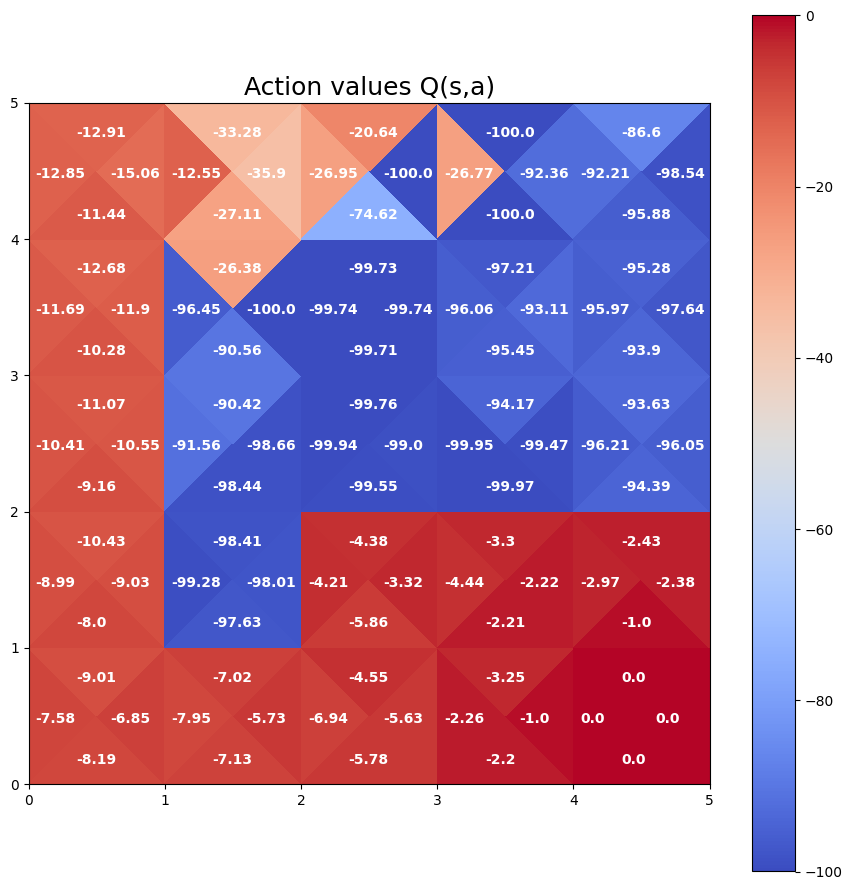

In [ ]:
plot_action_values(action_values)  # visualizing the updated action values after monte carlo training

Show resulting policy pi(.|s)

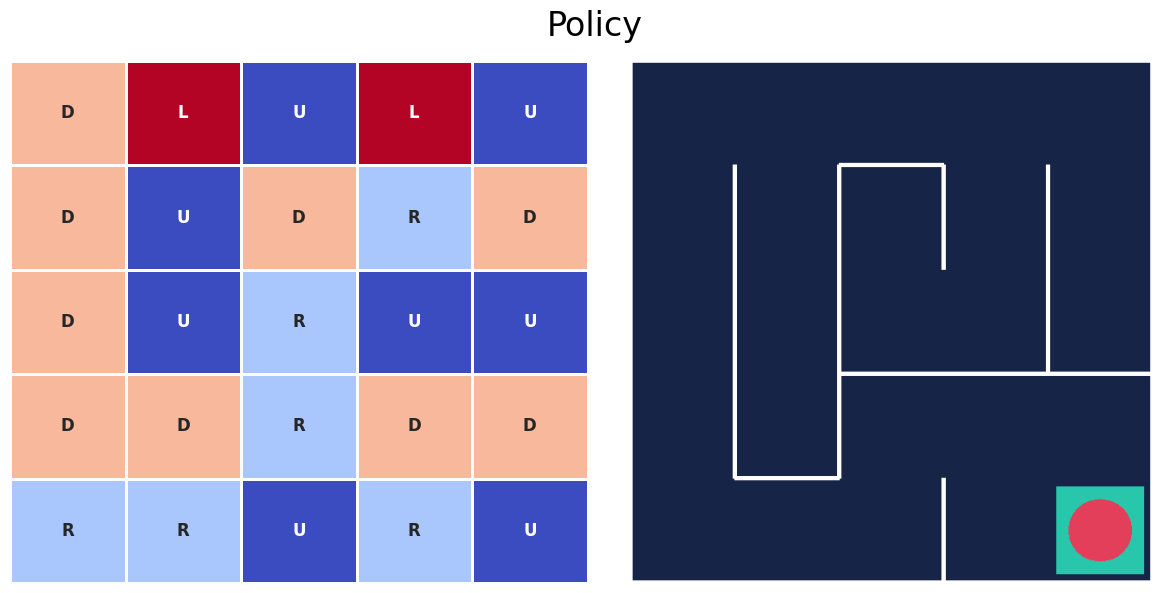

In [ ]:
plot_policy(action_values, frame)  # visualizing the learned policy on top of the maze image

Test the resulting agent

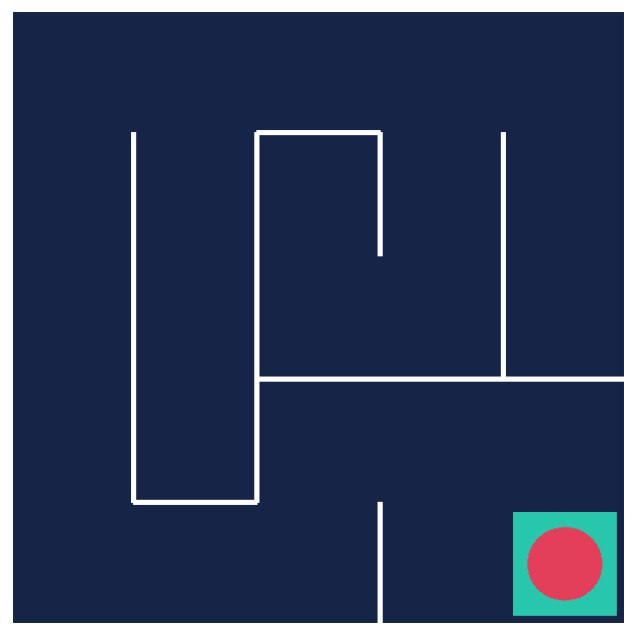

In [ ]:
test_agent(env, policy, episodes=5)  # testing the trained agent by running 5 episodes in the maze environment